In [1]:
import pandas as pd
import numpy as np

In [2]:
lr = pd.read_csv("NewspaperData.csv")
lr.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
lr

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [5]:
lr.info 

<bound method DataFrame.info of                          Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayun

In [6]:
lr.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [7]:
lr.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


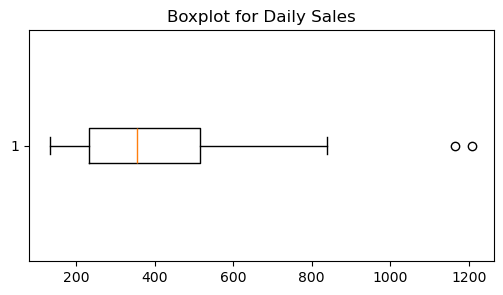

In [8]:
plt.figure(figsize=(6,3))
plt.title("Boxplot for Daily Sales")
plt.boxplot(lr["daily"],vert=False)
plt.show()

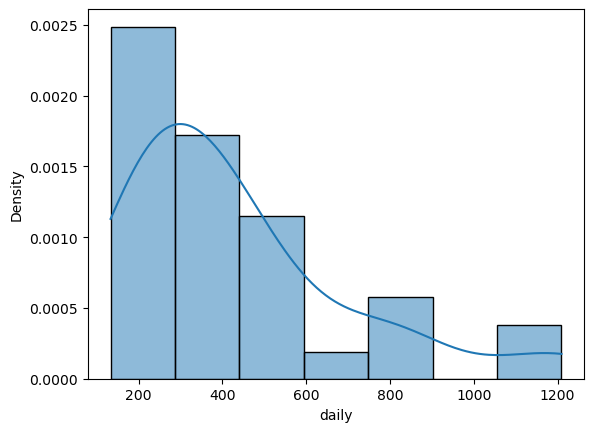

In [9]:
sns.histplot(lr['daily'],kde=True,stat='density',)
plt.show()

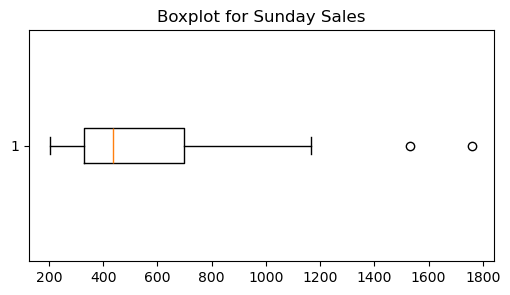

In [10]:
plt.figure(figsize=(6,3))
plt.title("Boxplot for Sunday Sales")
plt.boxplot(lr["sunday"],vert=False)
plt.show()

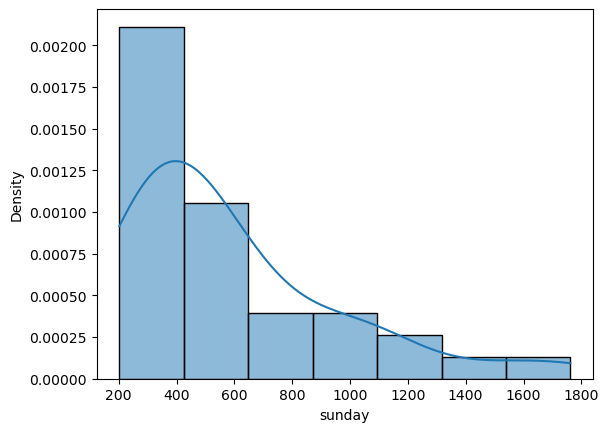

In [11]:
sns.histplot(lr['sunday'],kde=True,stat='density',)
plt.show()

#### Observations 
- There are no null values.
- It is right-skewed.
- There are outliers.

<Axes: xlabel='sunday', ylabel='Density'>

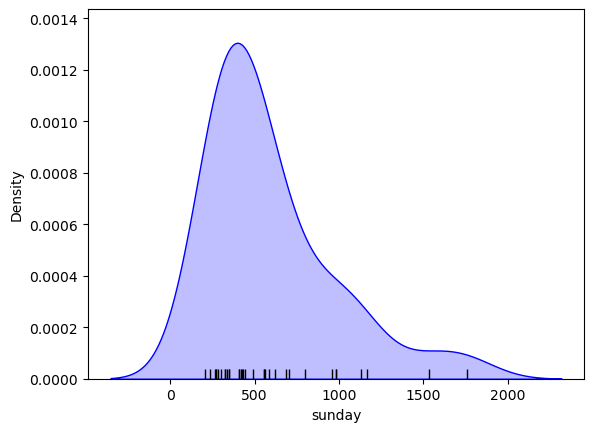

In [13]:
sns.kdeplot(data=lr["sunday"], fill=True, color="blue")
sns.rugplot(data=lr["sunday"], color="black")

#### SCATTER PLOT AND CORRELATION STRENGTH

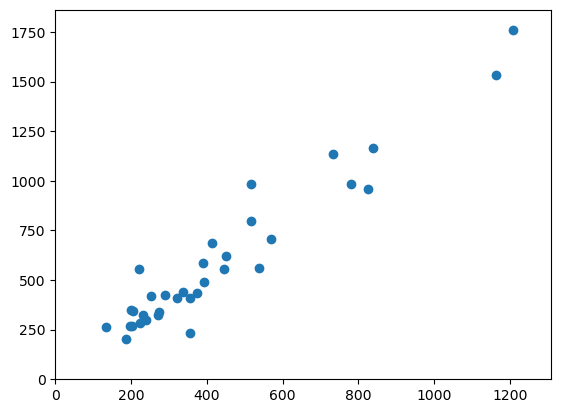

In [15]:
x=lr["daily"]
y=lr["sunday"]
plt.scatter(lr["daily"], lr["sunday"])
plt.xlim(0,max(x)+100)
plt.ylim(0,max(y)+100)
plt.show()

In [16]:
lr["daily"].corr(lr["sunday"])

0.9581543140785462

In [17]:
lr[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


#### Fit a Linear Regression Model

In [19]:
import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data=lr).fit()

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        12:05:14   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
newdata=pd.Series([200,300,1500])

In [55]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [63]:
import statsmodels. formula.api as smf
model1 = smf.ols("sunday~daily",data = lr).fit()

In [65]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        12:17:27   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
pred = model1.predict(lr["daily"])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [69]:
lr["y_hat"]=pred
lr

,Newspaper,daily,sunday,y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [71]:
lr["residuals"]=lr["sunday"]-lr["y_hat"]
lr

,Newspaper,daily,sunday,y_hat,residuals
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [77]:
mse = np.mean((lr["daily"]-lr["y_hat"]))**2
rmse=np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  25676.83874823877
RMSE:  160.23994117647064


In [79]:
mae = np.mean(np.abs(lr["daily"]-lr["y_hat"]))
mae

160.23994117647064

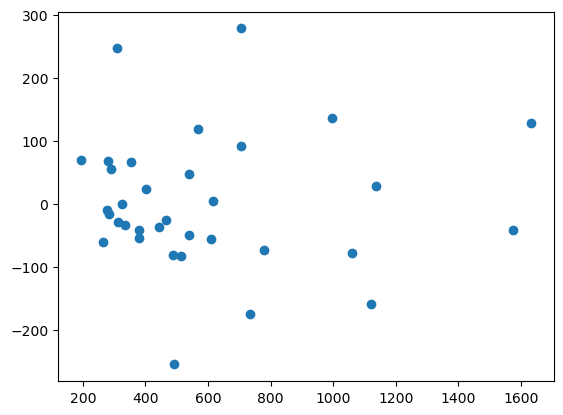

In [83]:
plt.scatter(lr["y_hat"], lr["residuals"])

#### Check the model residual for scatter plot(for homoscedasticity) and normality
- check the scatter plot for residuals Vs Y_hat check the Q-Q plot for residuals distribution check the kde hist plot for residuals

Text(0, 0.5, 'residuals')

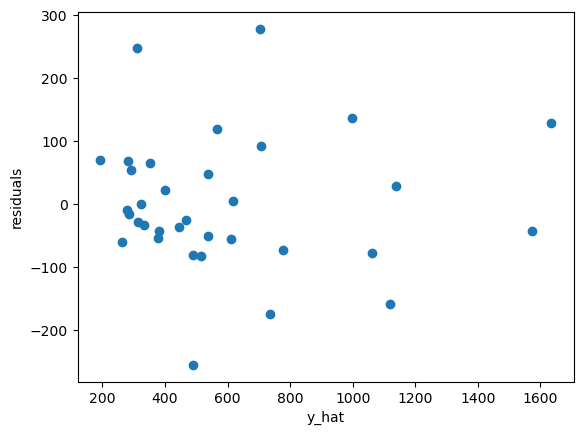

In [88]:
plt.scatter(lr["y_hat"],lr["residuals"])
plt.xlabel("y_hat")
plt.ylabel("residuals")

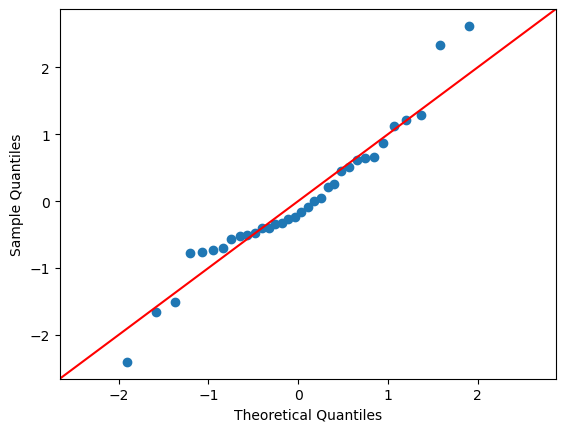

In [90]:
import statsmodels.api as sm
sm.qqplot(lr["residuals"],line='45',fit=True)
plt.show()

<Axes: xlabel='residuals', ylabel='Count'>

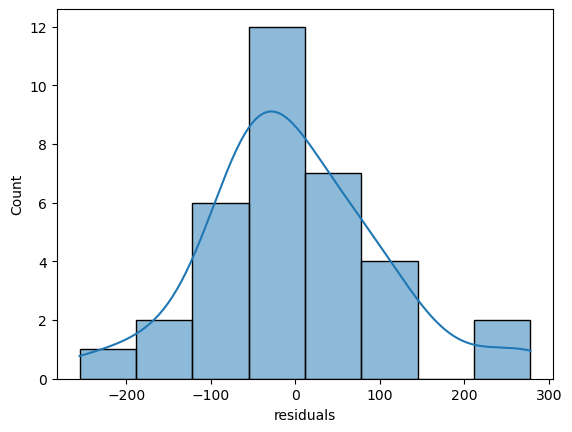

In [96]:
sns.histplot(lr["residuals"], kde=True)

#### Observations
- The data are seen to closely follow the reference line of normality.
- Hence the residuals are approximately normally distributed